# Início

Dar acesso ao Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importar bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Ler o ficheiro original (ficheiro muito pesado)

In [ ]:
df = pd.read_csv('./gdrive/MyDrive/BRASIL/MICRODADOS.csv',  sep=';', encoding="latin-1")

Ao desenvolver um sistema inteligente para cuidar de pacientes com COVID-19 em casa, é mais eficiente e relevante focar exclusivamente em casos confirmados da doença.

In [ ]:
df = df[df['Classificacao'] == 'Confirmados']
df = df.drop(['Classificacao'], axis = 1)

Como tinha um número muito baixo de NAs, investigamos um bocadinho mais o dataset, o que nos fez reparar que muitas entradas tinham o significado de "valor em falta" (NA).

In [ ]:
df = df.replace(['Não Informado','Ignorado','I','-'], np.nan)

Obter informação acerca dos NAs do dataset

In [ ]:
df

,DataNotificacao,DataCadastro,DataDiagnostico,DataColeta_RT_PCR,DataColetaTesteRapido,DataColetaSorologia,DataColetaSorologiaIGG,DataEncerramento,DataObito,Evolucao,...,ViagemBrasil,ViagemInternacional,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG,TipoTesteRapido
1,2021-07-09,2021-04-28,2021-07-09,NaN,2021-07-09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Não,Sim,Não,NaN,Positivo,NaN,NaN,Teste rápido Antígeno
3,2021-07-09,2021-04-29,2021-07-06,NaN,2021-07-09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Não,Não,Não,NaN,Positivo,NaN,NaN,Teste rápido Antígeno
10,2021-07-09,2021-07-09,2021-07-04,NaN,2021-07-09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Não,Não,Não,NaN,Positivo,NaN,NaN,Teste rápido Antígeno
17,2021-07-09,2021-07-09,2021-06-28,NaN,2021-07-05,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Não,Não,Não,NaN,Positivo,NaN,NaN,Teste rápido Antígeno
50,2021-07-09,2021-07-09,2021-03-17,2021-03-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Não,Não,Não,Positivo,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679238,2020-03-13,2020-04-14,2020-03-10,2020-03-13,NaN,NaN,NaN,2020-04-14,NaN,Cura,...,NaN,NaN,Não,Não,Não,Positivo,NaN,NaN,NaN,NaN
1679278,2020-03-11,2021-05-15,2020-03-09,NaN,2021-03-11,NaN,NaN,NaN,NaN,NaN,...,Não,NaN,Não,Não,Não,NaN,Positivo,NaN,NaN,Teste rápido Antígeno
1679310,2020-03-06,2020-04-16,2020-03-04,2020-10-08,NaN,NaN,NaN,2020-12-13,NaN,Cura,...,Não,Sim,Não,Não,Não,Positivo,NaN,NaN,NaN,NaN
1679312,2020-03-06,2020-04-14,2020-03-04,2020-03-06,NaN,NaN,NaN,2020-05-08,NaN,Cura,...,NaN,Sim,Não,NaN,NaN,Positivo,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526670 entries, 1 to 1679319
Data columns (total 44 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   DataNotificacao          526670 non-null  object
 1   DataCadastro             526670 non-null  object
 2   DataDiagnostico          526670 non-null  object
 3   DataColeta_RT_PCR        302866 non-null  object
 4   DataColetaTesteRapido    205407 non-null  object
 5   DataColetaSorologia      43368 non-null   object
 6   DataColetaSorologiaIGG   52675 non-null   object
 7   DataEncerramento         517019 non-null  object
 8   DataObito                11835 non-null   object
 9   Evolucao                 514003 non-null  object
 10  CriterioConfirmacao      521752 non-null  object
 11  StatusNotificacao        526670 non-null  object
 12  Municipio                526670 non-null  object
 13  Bairro                   522860 non-null  object
 14  FaixaEtaria        

# Data Cleaning

Dado que o nosso trabalho é desenvolver um assistente inteligente de cuidado remoto de doentes com COVID-19 e que os dados a que teremos acesso (em casa) são mais rudimentares, queremos usar apenas um certo conjunto de features.

Atributos que digam respeito às características demográficas do doente, como **idade** e **sexo**; atributos relativos a **datas relevantes** como a data de diagnóstico e a data de conclusão do caso; informação de **sintomas** e de **comorbilidades**; o **estado final** do doente - sobreviveu/faleceu são o tipo de atributos que nos interessa.

### Datas

Do comando anterior podemos ver que relativamente a datas, temos as seguintes datas:
```
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   DataNotificacao          526670 non-null  object
 1   DataCadastro             526670 non-null  object
 2   DataDiagnostico          526670 non-null  object
 3   DataColeta_RT_PCR        302866 non-null  object
 4   DataColetaTesteRapido    205407 non-null  object
 5   DataColetaSorologia      43368 non-null   object
 6   DataColetaSorologiaIGG   52675 non-null   object
 7   DataEncerramento         517019 non-null  object
 8   DataObito                11835 non-null   object
```

Repare-se que as datas de conclusão do caso e de óbito são redundantes quando existe uma coluna que contem o estado final do doente.

Posto isto, é possível, mais à frente, juntar ambas as colunas, **desde que se tenha acesso à informação do estado final**.

Assim, as únicas datas a serem **mantidas**, de momento, são ```DataDiagnostico```,```DataEncerramento``` e ```DataObito```. Todas as outras datas foram **removidas**.

In [ ]:
df = df.drop(['DataNotificacao','DataCadastro',
              'DataColeta_RT_PCR','DataColetaTesteRapido','DataColetaSorologia',
              'DataColetaSorologiaIGG'],axis=1)

### Informação do caso

Relativamente a informação fornecida sobre o caso, temos as seguintes colunas:


```
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 9   Evolucao                 514003 non-null  object
 10  CriterioConfirmacao      521752 non-null  object
 11  StatusNotificacao        526670 non-null  object
```



A coluna ```Evolucao``` contém informação sobre o **estado final** do doente que, como se trata de um dos atributes que consideramos relevantes para o nosso trabalho, irá ser **mantida**.

A coluna ```CriterioConfirmacao``` contem informação sobre como o caso foi confirmado (Laboratorial, Clinico Epidimiologico, Clinico). No entanto esta informação poderá não ser de fácil acesso, pelo que optamos por **remover**.

A coluna ```StatusNotificacao``` diz como está o caso do doente, assumindo o valor de "Em Aberto" ou de "Encerrado". No âmbito do nosso trabalho, interessa-nos apenas os casos encerrados. Como tal, esta coluna torna-se desnecessária pois não contém informação nenhuma inovadora, então optámos por **remover** esta coluna também.

In [ ]:
df = df.drop(['CriterioConfirmacao','StatusNotificacao'],axis=1)

### Informações Demográficas

Com respeito à informação "pessoal" de cada doente, temos as seguintes colunas:


```
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 12  Municipio                526670 non-null  object
 13  Bairro                   522860 non-null  object
 14  FaixaEtaria              526654 non-null  object
 15  IdadeNaDataNotificacao   526670 non-null  object
 16  Sexo                     526563 non-null  object
 17  RacaCor                  399220 non-null  object
 18  Escolaridade             332930 non-null  object
 19  Gestante                 524246 non-null  object
 36  ProfissionalSaude        477653 non-null  object
 37  PossuiDeficiencia        519125 non-null  object
 38  MoradorDeRua             518349 non-null  object
```



As colunas ```Municipio``` e ```Bairro```foram de imediato desconsideradas e **removidas** por serem consideradas irrelevantes para o nosso estudo e trabalho.

Repare-se que as colunas ```FaixaEtaria``` e ```IdadeNaDataNotificacao``` tem um número distinto de entradas. Como a coluna referente à idade precisa tem mais entradas que a coluna referente à faixa etária e como podemos sempre obter a faixa etária através da idade exata do doente, a primeira coluna é redundante. Assim optamos por **remover** a coluna```FaixaEtaria```e **manter** o atributo ```IdadeNaDataNotifcacao```.

O atributo ```Sexo``` foi considerado relevante, pelo que foi **mantido**.

A coluna ```RacaCor``` contém informação da etnia à qual o doente pertence. Esta informação foi **mantida** dado que existem doenças que são mais prevalentes numas etnias que em outras.

À semelhança de ```Municipio```e de ```Bairro```, as colunas ```Escolaridade``` e ```MoradorDeRua``` foram também **removidas** por serem consideradas irrelevantes à *scope* do nosso trabalho.

Relativamente à coluna ```Gestante``` que contém informação não só se a doente está ou não grávida, mas em caso afirmativo, diz em qual trimestre a doente se encontra. De momento esta coluna será **mantida**, mas o conteúdo da sua informação será transformado para binário onde **0** significa que não *está grávida* e **1** significa que *está grávida*.

As colunas ```ProfissionalSaude``` e ```PossuiDeficiencia``` são atributos binários com *sim* e *não* como posíveis valores. De momento serão **mantidas**, pois trata-se de informação de fácil acesso. Temos ainda de ver as representatividade das classes para perceber se serão relevantes ou não.

In [ ]:
df = df.drop(['Municipio','Bairro','FaixaEtaria','Escolaridade','MoradorDeRua'],axis=1)

In [ ]:
df.Gestante = df.Gestante.replace(['Não se aplica','Não','Idade gestacional ignorada'], 0)
df.Gestante = df.Gestante.replace(['1º trimeste','2º trimeste','3º trimeste'], 1)

### Sintomas + Comorbilidades

Com respeito aos **sintomas** e às **comorbilidades** que os doente apresentam aquando do diagnóstico temos os seguintes - em formato *One-hot Encoding*:


```
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 20  Febre                    525536 non-null  object
 21  DificuldadeRespiratoria  525571 non-null  object
 22  Tosse                    525554 non-null  object
 23  Coriza                   525547 non-null  object
 24  DorGarganta              525525 non-null  object
 25  Diarreia                 525546 non-null  object
 26  Cefaleia                 525523 non-null  object
 27  ComorbidadePulmao        525446 non-null  object
 28  ComorbidadeCardio        525474 non-null  object
 29  ComorbidadeRenal         525501 non-null  object
 30  ComorbidadeDiabetes      525458 non-null  object
 31  ComorbidadeTabagismo     525472 non-null  object
 32  ComorbidadeObesidade     525273 non-null  object
```



Dada a impotância inerente tanto aos sintomas, bem como às comorbilidades, e também dado o seu formato "amigável", **todas as colunas** referentes aos sintomas e às comorbilidades serão **mantidas**.

### Internamento

No que toca ao atributo de internamento temos o seguinte:

```
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 33  FicouInternado           239276 non-null  object
```


A coluna ```FicouInternado``` é um atributo binário *sim/não*. Dado o contexto do nosso trabalho, esta coluna será **mantida**, pelo menos de momento, pois poderá ser relevante para detetar casos mais graves.

### Mobilidade

Relatvamente à informação disponibilizada sobre a mobilidade dos doentes, temos as seguintes colunas:

```
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 34  ViagemBrasil             270151 non-null  object
 35  ViagemInternacional      231550 non-null  object
```

In [ ]:
df.ViagemBrasil.value_counts()

Não    248611
Sim     21540
Name: ViagemBrasil, dtype: int64

In [ ]:
df.ViagemInternacional.value_counts()

Não    231323
Sim       227
Name: ViagemInternacional, dtype: int64

Infelizmente, não contém informação útil, uma vez que se tratam apenas de atributos binários e que não tem mais detalhe nenhum sobre destino de viagem ou origem de viagem.

Assim, as colunas ```ViagemBrasil``` e ```ViagemInternacional``` foram **removidas**.

In [ ]:
df = df.drop(['ViagemBrasil','ViagemInternacional'], axis=1)

### Testagem

Com respeito à testagem e respetivos resultados, temos várias colunas, nomeadamente:

```
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 39  ResultadoRT_PCR          301100 non-null  object
 40  ResultadoTesteRapido     204615 non-null  object
 41  ResultadoSorologia       43266 non-null   object
 42  ResultadoSorologia_IGG   52615 non-null   object
 43  TipoTesteRapido          147027 non-null  object
```

Note-se que um doente que vá para casa para ser monitorizado não terá acesso a testes PCR, apenas terá acesso aos teste rápidos, e na maior parte das vezes, dentro desta categoria de testes, os mais acessíveis são os Antígeno.

Desta forma os testes PCR e os Sorológicos não são igualmente relevantes ao nosso trabalho como são os testes rápidos.

No entanto, logo no início, restringimos o dataset a apenas casos confirmados, i.e. doentes COVID-19, o que torna este conjunto de atributos desnecessário. Assim **todas as colunas** previamente apresentadas foram **removidas**.

In [ ]:
df = df.drop(['ResultadoRT_PCR','ResultadoTesteRapido','ResultadoSorologia','ResultadoSorologia_IGG','TipoTesteRapido'], axis=1)

### Missing Values

Agora que as colunas já foram avaliadas uma a uma, passamos às linhas. A maioria dos atributos do dataset são atributos binários, pelo que, pelo menos para estes atributos vamos eliminar as entradas que não têm valor nestas categorias.

In [ ]:
df = df.fillna('-')

# Sintomas
df = df[df['Febre'] != '-']
df = df[df['DificuldadeRespiratoria'] != '-']
df = df[df['Tosse'] != '-']
df = df[df['Coriza'] != '-']
df = df[df['DorGarganta'] != '-']
df = df[df['Diarreia'] != '-']
df = df[df['Cefaleia'] != '-']

# Comorbilidades
df = df[df['ComorbidadePulmao'] != '-']
df = df[df['ComorbidadeCardio'] != '-']
df = df[df['ComorbidadeRenal'] != '-']
df = df[df['ComorbidadeDiabetes'] != '-']
df = df[df['ComorbidadeObesidade'] != '-']

# Internamento
df = df[df['FicouInternado'] != '-']


# Profissional de Saúde
df = df[df['ProfissionalSaude'] != '-']

# Deficiência
df = df[df['PossuiDeficiencia'] != '-']

Ainda no seguimento de eliminar entradas, não faz sentido termos entradas missing values em colunas como ```DataEncerramento```, ```IdadeNaDataNotificacao```, ```Sexo``` e ```Racacor```.

In [ ]:
# Data Encerramento
df = df[df['DataEncerramento'] != '-']

# Idade
df = df[df['IdadeNaDataNotificacao'] != '-']

# Sexo
df = df[df['PossuiDeficiencia'] != '-']

# Etnia
df = df[df['RacaCor'] != '-']

# Data Transformation

Nesta secção faremos algumas transformações ao dataset. Nomeadamente:

1.   Criação da coluna ```DataFinal```.
2.   Calcular número de dias.
3.   Remover causas de morte (além COVID-19).
2.   Alteração do nome ```IdadeNaDataNotificacao``` e do tipo de dados.
3.   Alteração do nome ```Gestante```.
4.   Alteração do nome ```RacaCor```.


### Data Final

In [ ]:
datasEncerramento = list(df['DataEncerramento'])
datasObito = list(df['DataObito'])
status = list(df['Evolucao'])

datasFinais = []
statusFinais = []
for i in range(len(datasObito)):
  if datasEncerramento[i] != '-' and datasObito[i] != '-':
    datasFinais.append(datasObito[i])
    statusFinais.append(status[i])
  elif datasEncerramento[i] == '-' and datasObito[i] != '-':
    datasFinais.append(datasObito[i])
    statusFinais.append(status[i])
  elif datasEncerramento[i] != '-' and datasObito[i] == '-':
    datasFinais.append(datasEncerramento[i])
    statusFinais.append(status[i])
  else:
    datasFinais.append('-')
    statusFinais.append('-')

# Adicionar "DataFinal" ao dataset
df['DataFinal'] = datasFinais

# Remover "DataEncerramento" e "DataObito"
df = df.drop(['DataEncerramento','DataObito'], axis=1)

Agora que eliminamos uma das colunas com maior percentagem de *missing values*, vamos tornar este datset num tidy dataset, removendo todas as entradas que contêm NAs.

In [ ]:
df = df.replace('-', np.nan)
df = df.dropna()

### Contar dias

Com a data final, vamos agora calcular o número de dias entre a data de diagnóstico e a data final. Para os que sobreviveram, este resultado deve ser interpretado como duração da doença e, para os que não sobreviveram, como quantos dias até morrer.

In [ ]:
from datetime import datetime

datasDiagnostico = list(df['DataDiagnostico'])
datasFinais = list(df['DataFinal'])

numDias = []

for i in range(len(datasDiagnostico)):
  date_format = "%Y-%m-%d"
  a = datetime.strptime(datasDiagnostico[i], date_format)
  b = datetime.strptime(datasFinais[i], date_format)
  delta = b - a
  numDias.append(delta.days)

df['NumDias'] = numDias
df['NumDias'].value_counts()

 10     25058
 14     16391
 15     15829
 11     13214
 13     12414
        ...  
-27         1
-167        1
-188        1
-54         1
 448        1
Name: NumDias, Length: 384, dtype: int64

Dado que existem valores negativos e não é possível que hajam tais valores, vamos considerá-los erros e removê-los.

In [ ]:
df = df[df['NumDias'] >= 0]

Vamos agora ver um bocadinho melhor a distribuição desta variável

In [ ]:
df['NumDias'].describe()

count    189740.000000
mean         20.311579
std          30.188810
min           0.000000
25%          11.000000
50%          15.000000
75%          21.000000
max        7485.000000
Name: NumDias, dtype: float64

Temos como número máximo de dias 7485 dias o que não oderá ser possível, dado que o dataset reporta o período de Janeiro de 2020 a Julho de 2021, que são 577 dias.

Será que tem mais valores assim desproporcionais? Vamos averiguar com um caixa de bigodes.

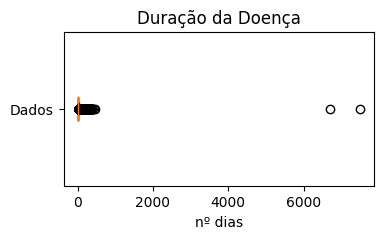

In [ ]:
# Criar caixa de bigodes horizontal
fig, ax = plt.subplots(figsize=(4,2))
ax.boxplot(df['NumDias'], vert=False)

# Set plot properties
ax.set_title('Duração da Doença')
ax.set_xlabel('nº dias')
ax.set_yticklabels(['Dados'])
plt.show()

Os dois pontos acima de 6000 dias foram considerados erros de inserção e por isso são removidos.

In [ ]:
df = df[df['NumDias'] <= 1000]

In [ ]:
df['NumDias'].describe()

count    189738.000000
mean         20.237037
std          19.560225
min           0.000000
25%          11.000000
50%          15.000000
75%          21.000000
max         448.000000
Name: NumDias, dtype: float64

Dado que o novo máximo são 448 dias, que é menor que o período de observação, já podemos aceitar estes valores.

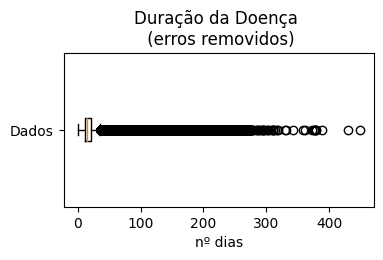

In [ ]:
# Criar caixa de bigodes horizontal
fig, ax = plt.subplots(figsize=(4,2))
ax.boxplot(df['NumDias'], vert=False)

# Set plot properties
ax.set_title('Duração da Doença \n (erros removidos)')
ax.set_xlabel('nº dias')
ax.set_yticklabels(['Dados'])
plt.show()

Note-se que, por definição, temos muitos outliers no que toca à duração da doença.

### Causas de Morte

Vamos agora verificar os valores da coluna ```Evolucao```

In [ ]:
df.Evolucao.value_counts()

Cura                       182851
Óbito pelo COVID-19          6779
Óbito por outras causas       108
Name: Evolucao, dtype: int64

Como não nos interessa ter *missing values* ou *morte por outras causas*, vamos remover essas entradas.

In [ ]:
df = df[df['Evolucao'] != 'Óbito por outras causas']

### Mudar Idade

Vamos transformar a string que contem informação acerca da idade do doente, num inteiro e criar uma nova coluna chamada ```Idade```. Uma vez que a nova coluna for criada, remove-se a antiga.

In [ ]:
def getAge(age):
  ans = age.split(' ')
  ans = ans[0]
  return int(ans)

df['Idade'] = df['IdadeNaDataNotificacao'].apply(getAge)
df = df.drop(['IdadeNaDataNotificacao'], axis =1)


<ipython-input-29-6912382abc22>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Idade'] = df['IdadeNaDataNotificacao'].apply(getAge)


Agora, analogamente à variavel numérica ```NumDias``, vamos averiguar se todos os valores fazem sentido.

In [ ]:
df['Idade'].describe()

count    189630.000000
mean         41.073116
std          17.677315
min          -1.000000
25%          28.000000
50%          39.000000
75%          53.000000
max         111.000000
Name: Idade, dtype: float64

O facto de termos um valor de idade negativo, faz com que tenhamos de desconsiderar essas entradas, pois foram consideradas erros.

In [ ]:
df = df[df['Idade'] >= 0]

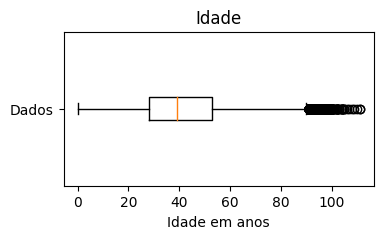

In [ ]:
# Criar caixa de bigodes horizontal
fig, ax = plt.subplots(figsize=(4,2))
ax.boxplot(df['Idade'], vert=False)

# Set plot properties
ax.set_title('Idade')
ax.set_xlabel('Idade em anos')
ax.set_yticklabels(['Dados'])
plt.show()

Semelhante à duração da doença, por definição, temos muitos outliers no que toca às idades dos doentes presentes no dataset.

In [ ]:
df

,DataDiagnostico,Evolucao,Sexo,RacaCor,Gestante,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,...,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ProfissionalSaude,PossuiDeficiencia,DataFinal,NumDias,Idade
409,2021-06-27,Cura,M,Parda,0.0,Não,Não,Não,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,2021-07-09,12,24
500,2021-06-29,Cura,M,Parda,0.0,Não,Não,Não,Não,Sim,...,Não,Não,Não,Não,Não,Não,Não,2021-07-09,10,26
1135,2021-06-16,Cura,M,Branca,0.0,Sim,Não,Sim,Sim,Sim,...,Não,Não,Não,Não,Não,Não,Não,2021-06-26,10,32
2275,2021-06-21,Cura,F,Parda,0.0,Não,Não,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,2021-06-30,9,22
3700,2021-07-05,Cura,F,Parda,0.0,Não,Não,Sim,Sim,Sim,...,Não,Não,Não,Não,Não,Não,Não,2021-07-09,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678890,2020-03-17,Cura,M,Branca,0.0,Sim,Não,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,2020-04-15,29,54
1678892,2020-03-13,Cura,M,Parda,0.0,Sim,Sim,Sim,Não,Sim,...,Não,Não,Não,Não,Não,Não,Não,2020-04-15,33,28
1679056,2020-03-15,Cura,M,Branca,0.0,Sim,Sim,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,2020-04-14,30,41
1679130,2020-03-14,Cura,F,Parda,0.0,Não,Não,Não,Sim,Não,...,Não,Não,Não,Não,Não,Não,Não,2020-04-15,32,57


In [ ]:
df.to_csv('df_after_cleaning.csv', index=False)